In [89]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution
import pandas as pd

**On utilise le calcul symbolique pour les expressions correctes des fonctions**

In [90]:
import sympy as sp 
sp.init_printing()

x, y = sp.symbols('x y')
a = sp.symbols('a', real=True)

In [91]:
f = (x**2 + y - 11)**2 + (x + y**2 - 7)**2
print(f)
gradf = [sp.diff(f, var) for var in (x,y)]
print(gradf)

hessian = sp.Matrix([[sp.diff(f, var1, var2) for var1 in (x, y)] 
                    for var2 in (x, y)])

print("La hessienne : ")
print(hessian)

(x + y**2 - 7)**2 + (x**2 + y - 11)**2
[4*x*(x**2 + y - 11) + 2*x + 2*y**2 - 14, 2*x**2 + 4*y*(x + y**2 - 7) + 2*y - 22]
La hessienne : 
Matrix([[2*(6*x**2 + 2*y - 21), 4*(x + y)], [4*(x + y), 2*(2*x + 6*y**2 - 13)]])


In [10]:
solution = [sp.solve(expr, (x,y)) for expr in gradf]
print("le point min est : ")
print(solution)

le point min est : 
[[(-(63/2 - 3*y)/(3*(27*y**2/4 + sqrt(-4*(63/2 - 3*y)**3 + (27*y**2/2 - 189/2)**2)/2 - 189/4)**(1/3)) - (27*y**2/4 + sqrt(-4*(63/2 - 3*y)**3 + (27*y**2/2 - 189/2)**2)/2 - 189/4)**(1/3)/3, y), (-(63/2 - 3*y)/(3*(-1/2 - sqrt(3)*I/2)*(27*y**2/4 + sqrt(-4*(63/2 - 3*y)**3 + (27*y**2/2 - 189/2)**2)/2 - 189/4)**(1/3)) - (-1/2 - sqrt(3)*I/2)*(27*y**2/4 + sqrt(-4*(63/2 - 3*y)**3 + (27*y**2/2 - 189/2)**2)/2 - 189/4)**(1/3)/3, y), (-(63/2 - 3*y)/(3*(-1/2 + sqrt(3)*I/2)*(27*y**2/4 + sqrt(-4*(63/2 - 3*y)**3 + (27*y**2/2 - 189/2)**2)/2 - 189/4)**(1/3)) - (-1/2 + sqrt(3)*I/2)*(27*y**2/4 + sqrt(-4*(63/2 - 3*y)**3 + (27*y**2/2 - 189/2)**2)/2 - 189/4)**(1/3)/3, y)], [(-y - sqrt(-2*y**3 + y**2 + 13*y + 11), y), (-y + sqrt(-2*y**3 + y**2 + 13*y + 11), y)]]


In [ ]:
## Définition de la fonction:

def f_himmelblau(X):
    x, y = X
    #La fonction de Hamilton sous la forme (x^2 + y − 11)^2 + (x + y^2 − 7)^2
    
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

def grad_himmelblau(X):
    # le gradient est un vecteur [4x(x^2 + y - 11) + 2 (x+ y^2 - 7), 2(x^2 + y -11) + 2y(x+ y^2 - 7)]
    x, y = X

    return np.array([4*x*(x**2 + y - 11) +  2*(x+ y**2 - 7), 2*x**2 + 4*y*(x + y**2 - 7) + 2*y - 22])



### Ici on affiche la courbe

/tmp/ipykernel_10480/1361997662.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


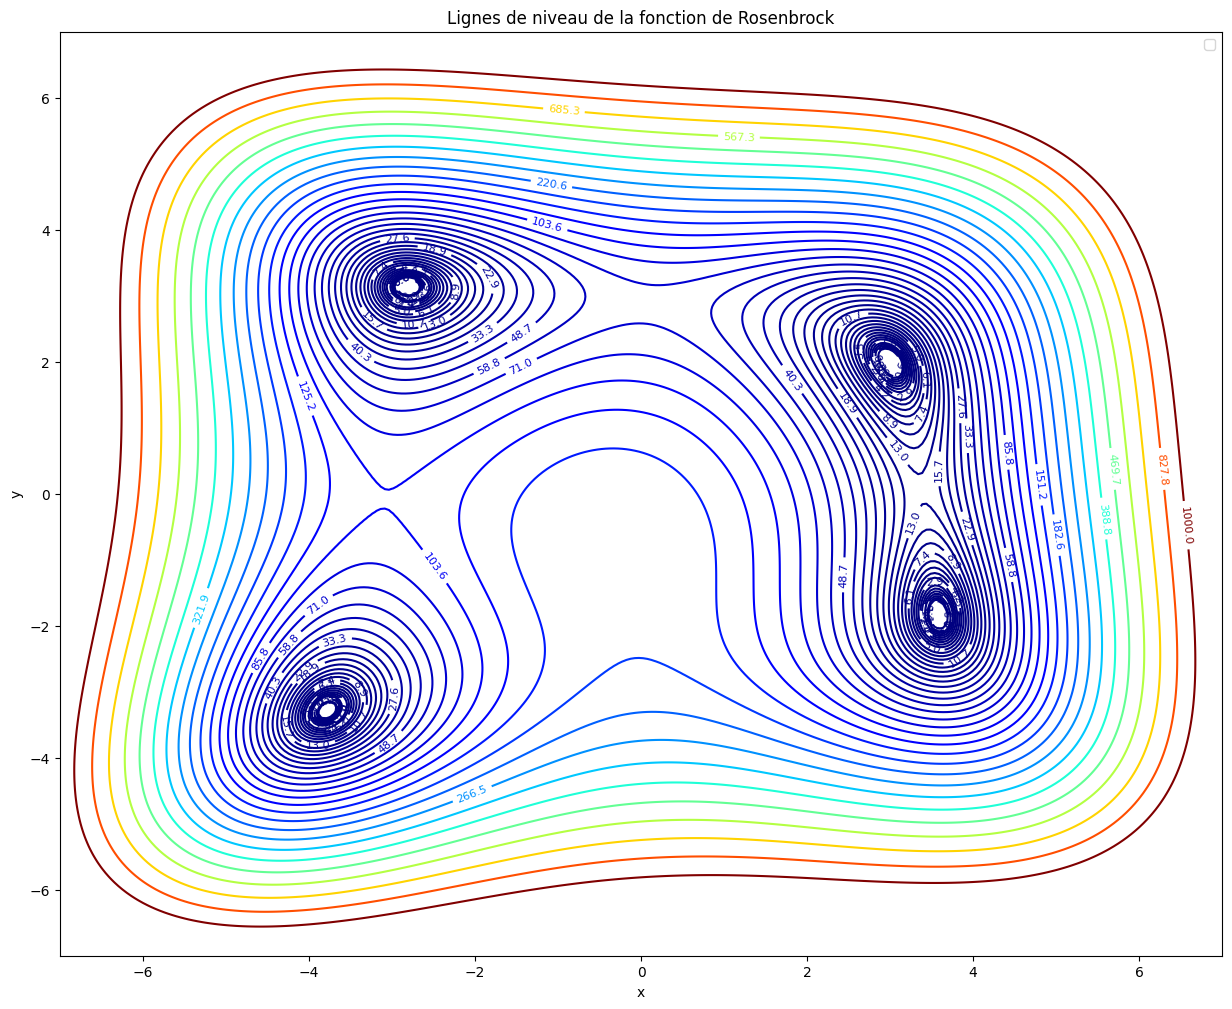

In [23]:
x = np.linspace(-7, 7, 280)
y = np.linspace(-7, 7, 280)

X, Y = np.meshgrid(x, y)
Z = f_himmelblau([X, Y])

plt.figure(figsize=(15,12))
contours = plt.contour(X, Y, Z, levels=np.logspace(-0.2, 3, 40), cmap='jet')
plt.clabel(contours, inline=True, fontsize=8)
#plt.plot(1, 1, 'r*', markersize=15, label='Minimum Global (1, 1)')
plt.title('Lignes de niveau de la fonction de Rosenbrock')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

**Maintenant on peut effectuer la descente pour chaque point Connue individuellement**

#### Descente à pas Optimal

### Pas optimal

* Les minima sont connues et leur valeurs est $
    (3.0, 2.0),
    (-2.805118, 3.131312),
    (-3.779310, -3.283186),
    (3.584428, -1.848126)
$
* Points de départ proches mais pas exactement sur les minima
$starts = [
    (2.2, 1.7),
    (-1.5, 4.0),
    (-4.8, -4.0),
    (3.0, -2.5)
]$

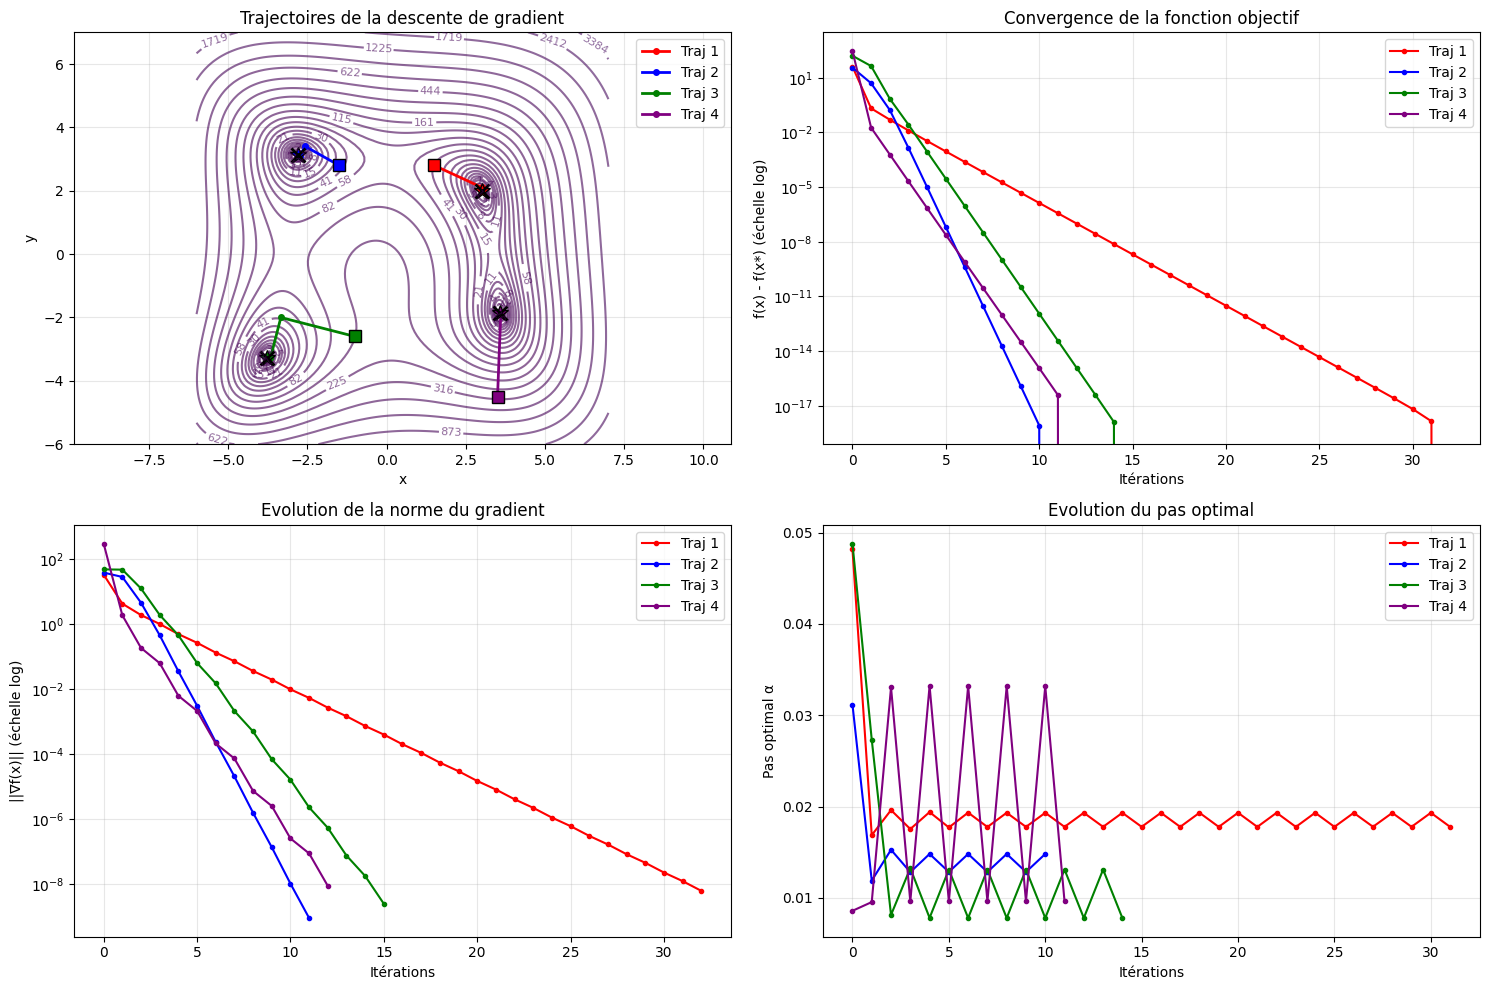

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar


def pas_optimal(xy, d):
    """Trouve le pas optimal dans la direction d"""
    def f_alpha(alpha):
        nouveau_point = xy - alpha * d
        return f_himmelblau(nouveau_point)
    
    result = minimize_scalar(f_alpha, bounds=(0, 1), method='bounded')
    return result.x

def descente_gradient_pas_optimal(point_depart, tol=1e-8, max_iter=1000):
    """Descente de gradient avec pas optimal"""
    points = [point_depart.copy()]
    valeurs = [f_himmelblau(point_depart)]
    iterations = 0
    
    point_courant = point_depart.copy()
    
    for i in range(max_iter):
        # Calcul du gradient
        grad = grad_himmelblau(point_courant)
        
        # Vérification de la convergence
        norme_grad = np.linalg.norm(grad)
        if norme_grad < tol:
            break
            
        # Calcul du pas optimal
        alpha_opt = pas_optimal(point_courant, grad)
        
        # Mise à jour du point
        point_courant = point_courant - alpha_opt * grad
        
        # Stockage des résultats
        points.append(point_courant.copy())
        valeurs.append(f_himmelblau(point_courant))
        iterations += 1
    
    return np.array(points), np.array(valeurs), iterations

# Points de départ pour converger vers différents minimums
points_depart = [
    np.array([1.5, 2.8]),      # Vers (3, 2)
    np.array([-1.5, 2.8]),     # Vers (-2.805118, 3.131312)
    np.array([-1.0, -2.6]),    # Vers (-3.779310, -3.283186)
    np.array([3.5, -4.5]),     # Vers (3.584428, -1.848126)
]

# Minimums théoriques de la fonction de Himmelblau dans l'ordre des points proches
minimums_theoriques = [
    np.array([3.0, 2.0]),
    np.array([-2.805, 3.131]),
    np.array([-3.779, -3.283]),
    np.array([3.584, -1.848])
    
]

# Couleurs pour chaque trajectoire
couleurs = ['red', 'blue', 'green', 'purple']

# Configuration des plots
plt.figure(figsize=(15, 10))

# Plot 1: Trajectoires dans l'espace 2D
plt.subplot(2, 2, 1)

# Création d'un mesh pour le contour
x = np.linspace(-6, 7, 200)
y = np.linspace(-6, 7, 100)
X, Y = np.meshgrid(x, y)
Z = f_himmelblau([X, Y])

# Tracé des contours
levels = np.logspace(0,5,35)
contours = plt.contour(X, Y, Z, levels=levels, alpha=0.6)
plt.clabel(contours, inline=True, fontsize=8)

# Exécution de la descente de gradient pour chaque point de départ
trajectoires = []
for i, point_depart in enumerate(points_depart):
    points, valeurs, iterations = descente_gradient_pas_optimal(point_depart)
    trajectoires.append((points, valeurs))
    
    # Tracé de la trajectoire
    plt.plot(points[:, 0], points[:, 1], 'o-', color=couleurs[i], 
             markersize=4, linewidth=2, label=f'Traj {i+1}')
    plt.plot(points[0, 0], points[0, 1], 's', color=couleurs[i], 
             markersize=8, markeredgecolor='black')
    plt.plot(points[-1, 0], points[-1, 1], '*', color=couleurs[i], 
             markersize=12, markeredgecolor='black')

# Tracé des minimums théoriques
for min_th in minimums_theoriques:
    plt.plot(min_th[0], min_th[1], 'kx', markersize=10, markeredgewidth=2)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Trajectoires de la descente de gradient')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')

# Plot 2: Convergence de la fonction objectif
plt.subplot(2, 2, 2)
for i, (points, valeurs) in enumerate(trajectoires):
    plt.semilogy(valeurs - valeurs[-1], 'o-', color=couleurs[i], 
                markersize=3, label=f'Traj {i+1}')
plt.xlabel('Itérations')
plt.ylabel('f(x) - f(x*) (échelle log)')
plt.title('Convergence de la fonction objectif')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Evolution de la norme du gradient
plt.subplot(2, 2, 3)
for i, (points, valeurs) in enumerate(trajectoires):
    normes_grad = [np.linalg.norm(grad_himmelblau(point)) for point in points]
    plt.semilogy(normes_grad, 'o-', color=couleurs[i], 
                markersize=3, label=f'Traj {i+1}')
plt.xlabel('Itérations')
plt.ylabel('||∇f(x)|| (échelle log)')
plt.title('Evolution de la norme du gradient')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 4: Pas optimal à chaque itération
plt.subplot(2, 2, 4)
for i, (points, valeurs) in enumerate(trajectoires):
    pas_optimaux = []
    for j in range(len(points)-1):
        direction = points[j+1] - points[j]
        pas = np.linalg.norm(direction) / np.linalg.norm(grad_himmelblau(points[j]))
        pas_optimaux.append(pas)
    
    plt.plot(pas_optimaux, 'o-', color=couleurs[i], 
             markersize=3, label=f'Traj {i+1}')
plt.xlabel('Itérations')
plt.ylabel('Pas optimal α')
plt.title('Evolution du pas optimal')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



In [86]:
# Affichage des résultats détaillés
print("RÉSULTATS DE LA DESCENTE DE GRADIENT AVEC PAS OPTIMAL")
print("=" * 60)

for i, (points, valeurs, iterations) in enumerate([(p, v, len(p)-1) for p, v in trajectoires]):
    point_final = points[-1]
    valeur_finale = valeurs[-1]
    
    print(f"\nTrajectoire {i+1}:")
    print(f"  Point de départ: ({points[0, 0]:.3f}, {points[0, 1]:.3f})")
    print(f"  Point final:     ({point_final[0]:.3f}, {point_final[1]:.3f})")
    print(f"  Valeur finale:   {valeur_finale:.6e}")
    print(f"  Itérations:      {iterations}")
    print(f"  Norme du gradient final: {np.linalg.norm(grad_himmelblau(point_final)):.6e}")

# Vérification de la précision par rapport aux minimums théoriques
print(f"\n{' VERIFICATION DES MINIMUMS ':^60}")
print("=" * 60)

for i, min_th in enumerate(minimums_theoriques):
    print(f"Minimum théorique {i+1}: ({min_th[0]:.3f}, {min_th[1]:.3f})")
    print(f"  f(x*) = {f_himmelblau(min_th):.6e}")

RÉSULTATS DE LA DESCENTE DE GRADIENT AVEC PAS OPTIMAL

Trajectoire 1:
  Point de départ: (1.500, 2.800)
  Point final:     (3.000, 2.000)
  Valeur finale:   5.345514e-19
  Itérations:      32
  Norme du gradient final: 6.341621e-09

Trajectoire 2:
  Point de départ: (-1.500, 2.800)
  Point final:     (-2.805, 3.131)
  Valeur finale:   5.551510e-21
  Itérations:      11
  Norme du gradient final: 9.268038e-10

Trajectoire 3:
  Point de départ: (-1.000, -2.600)
  Point final:     (-3.779, -3.283)
  Valeur finale:   4.402403e-20
  Itérations:      15
  Norme du gradient final: 2.548248e-09

Trajectoire 4:
  Point de départ: (3.500, -4.500)
  Point final:     (3.584, -1.848)
  Valeur finale:   1.400446e-18
  Itérations:      12
  Norme du gradient final: 9.026274e-09

                 VERIFICATION DES MINIMUMS                  
Minimum théorique 1: (3.000, 2.000)
  f(x*) = 0.000000e+00
Minimum théorique 2: (-2.805, 3.131)
  f(x*) = 4.332546e-06
Minimum théorique 3: (-3.779, -3.283)
  f(x*)

# 

# 

## Pas fixe

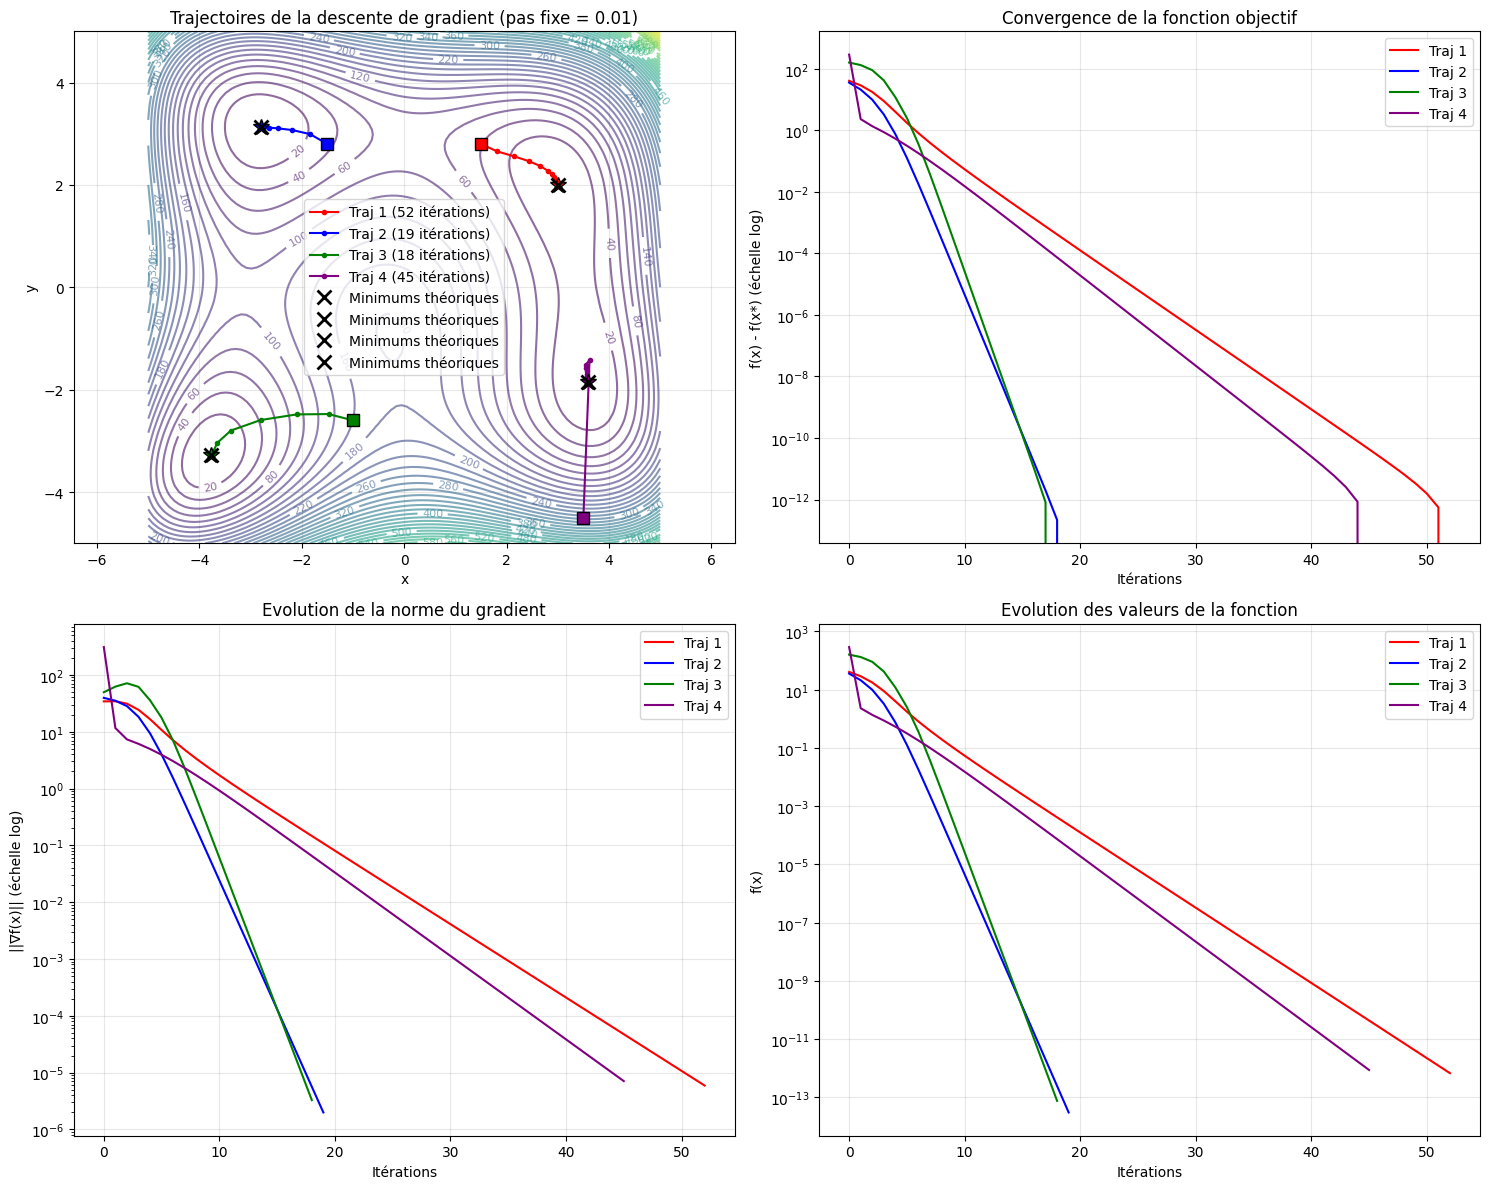

RÉSULTATS DE LA DESCENTE DE GRADIENT AVEC PAS FIXE = 0.01

Trajectoire 1:
  Point de départ:  (1.500, 2.800)
  Point final:      (3.000, 2.000)
  Minimum théorique:(3.000, 2.000)
  Erreur position:  0.000000
  Valeur initiale:  4.087810e+01
  Valeur finale:    6.822983e-13
  Itérations:       52
  Norme gradient:   5.923817e-06

Trajectoire 2:
  Point de départ:  (-1.500, 2.800)
  Point final:      (-2.805, 3.131)
  Minimum théorique:(-2.805, 3.131)
  Erreur position:  0.000334
  Valeur initiale:  3.583810e+01
  Valeur finale:    3.057598e-14
  Itérations:       19
  Norme gradient:   1.991260e-06

Trajectoire 3:
  Point de départ:  (-1.000, -2.600)
  Point final:      (-3.779, -3.283)
  Minimum théorique:(-3.779, -3.283)
  Erreur position:  0.000362
  Valeur initiale:  1.602976e+02
  Valeur finale:    7.627007e-14
  Itérations:       18
  Norme gradient:   3.290022e-06

Trajectoire 4:
  Point de départ:  (3.500, -4.500)
  Point final:      (3.584, -1.848)
  Minimum théorique:(3.584, -

In [87]:


def descente_gradient_pas_fixe(point_depart, alpha=0.01, tol=1e-8, max_iter=10000):
    """Descente de gradient avec pas fixe"""
    points = [point_depart.copy()]
    valeurs = [f_himmelblau(point_depart)]
    iterations = 0
    
    point_courant = point_depart.copy()
    
    for i in range(max_iter):
        # Calcul du gradient
        grad = grad_himmelblau(point_courant)
        
        # Vérification de la convergence
        norme_grad = np.linalg.norm(grad)
        if norme_grad < tol:
            break
            
        # Mise à jour du point avec pas fixe
        point_courant = point_courant - alpha * grad
        
        # Stockage des résultats
        points.append(point_courant.copy())
        valeurs.append(f_himmelblau(point_courant))
        iterations += 1
        
        # Arrêt supplémentaire si la fonction ne diminue plus significativement
        if len(valeurs) > 10 and abs(valeurs[-1] - valeurs[-2]) < 1e-12:
            break
    
    return np.array(points), np.array(valeurs), iterations

# Points de départ pour converger vers différents minimums
points_depart = [
    np.array([1.5, 2.8]),      # Vers (3, 2)
    np.array([-1.5, 2.8]),     # Vers (-2.805118, 3.131312)
    np.array([-1.0, -2.6]),    # Vers (-3.779310, -3.283186)
    np.array([3.5, -4.5]),     # Vers (3.584428, -1.848126)
]

# Minimums théoriques de la fonction de Himmelblau dans l'ordre des points proches
minimums_theoriques = [
    np.array([3.0, 2.0]),
    np.array([-2.805, 3.131]),
    np.array([-3.779, -3.283]),
    np.array([3.584, -1.848])
    
]

# Couleurs pour chaque trajectoire
couleurs = ['red', 'blue', 'green', 'purple']

# Configuration des plots
plt.figure(figsize=(15, 12))

# Plot 1: Trajectoires dans l'espace 2D
plt.subplot(2, 2, 1)

# Création d'un mesh pour le contour
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f_himmelblau([X, Y])

# Tracé des contours
contours = plt.contour(X, Y, Z, levels=50, alpha=0.6)
plt.clabel(contours, inline=True, fontsize=8)

# Exécution de la descente de gradient pour chaque point de départ
trajectoires = []
for i, point_depart in enumerate(points_depart):
    points, valeurs, iterations = descente_gradient_pas_fixe(point_depart, alpha=0.01)
    trajectoires.append((points, valeurs, iterations))
    
    # Tracé de la trajectoire (points moins denses pour la lisibilité)
    step = max(1, len(points) // 50)  # Afficher environ 50 points par trajectoire
    indices = list(range(0, len(points), step)) + [len(points)-1]
    
    plt.plot(points[indices, 0], points[indices, 1], 'o-', color=couleurs[i], 
             markersize=3, linewidth=1.5, label=f'Traj {i+1} ({iterations} itérations)')
    plt.plot(points[0, 0], points[0, 1], 's', color=couleurs[i], 
             markersize=8, markeredgecolor='black')
    plt.plot(points[-1, 0], points[-1, 1], '*', color=couleurs[i], 
             markersize=12, markeredgecolor='black')

# Tracé des minimums théoriques
for min_th in minimums_theoriques:
    plt.plot(min_th[0], min_th[1], 'kx', markersize=10, markeredgewidth=2, label='Minimums théoriques')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Trajectoires de la descente de gradient (pas fixe = 0.01)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')

# Plot 2: Convergence de la fonction objectif
plt.subplot(2, 2, 2)
for i, (points, valeurs, iterations) in enumerate(trajectoires):
    plt.semilogy(valeurs - valeurs[-1], '-', color=couleurs[i], 
                linewidth=1.5, label=f'Traj {i+1}')
plt.xlabel('Itérations')
plt.ylabel('f(x) - f(x*) (échelle log)')
plt.title('Convergence de la fonction objectif')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Evolution de la norme du gradient
plt.subplot(2, 2, 3)
for i, (points, valeurs, iterations) in enumerate(trajectoires):
    normes_grad = [np.linalg.norm(grad_himmelblau(point)) for point in points]
    plt.semilogy(normes_grad, '-', color=couleurs[i], 
                linewidth=1.5, label=f'Traj {i+1}')
plt.xlabel('Itérations')
plt.ylabel('||∇f(x)|| (échelle log)')
plt.title('Evolution de la norme du gradient')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 4: Comparaison des valeurs de la fonction
plt.subplot(2, 2, 4)
for i, (points, valeurs, iterations) in enumerate(trajectoires):
    plt.plot(valeurs, '-', color=couleurs[i], linewidth=1.5, label=f'Traj {i+1}')
plt.xlabel('Itérations')
plt.ylabel('f(x)')
plt.title('Evolution des valeurs de la fonction')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

plt.tight_layout()
plt.show()

# Affichage des résultats détaillés
print("RÉSULTATS DE LA DESCENTE DE GRADIENT AVEC PAS FIXE = 0.01")
print("=" * 65)

for i, (points, valeurs, iterations) in enumerate(trajectoires):
    point_final = points[-1]
    valeur_finale = valeurs[-1]
    valeur_initiale = valeurs[0]
    
    print(f"\nTrajectoire {i+1}:")
    print(f"  Point de départ:  ({points[0, 0]:.3f}, {points[0, 1]:.3f})")
    print(f"  Point final:      ({point_final[0]:.3f}, {point_final[1]:.3f})")
    print(f"  Minimum théorique:({minimums_theoriques[i][0]:.3f}, {minimums_theoriques[i][1]:.3f})")
    print(f"  Erreur position:  {np.linalg.norm(point_final - minimums_theoriques[i]):.6f}")
    print(f"  Valeur initiale:  {valeur_initiale:.6e}")
    print(f"  Valeur finale:    {valeur_finale:.6e}")
    print(f"  Itérations:       {iterations}")
    print(f"  Norme gradient:   {np.linalg.norm(grad_himmelblau(point_final)):.6e}")

# Analyse comparative
# print(f"\n{' ANALYSE COMPARATIVE ':^65}")
# print("=" * 65)

# print(f"\nParamètres utilisés:")
# print(f"  Pas fixe alpha = 0.01")
# print(f"  Tolérance = 1e-8")
# print(f"  Itérations maximales = 10000")

# total_iterations = sum([it for _, _, it in trajectoires])
# print(f"\nTotal d'itérations pour les 4 trajectoires: {total_iterations}")

# # Test avec différents pas pour comparaison
# print(f"\n{' TEST AVEC DIFFÉRENTS PAS ':^65}")
# print("=" * 65)

# pas_test = [0.001, 0.005, 0.01, 0.02]
# point_test = np.array([0.0, 0.0])  # Point de départ pour le test

# for pas in pas_test:
#     points, valeurs, iterations = descente_gradient_pas_fixe(point_test, alpha=pas, max_iter=5000)
#     point_final = points[-1]
#     print(f"Pas = {pas:.3f}: {iterations:4d} itérations → ({point_final[0]:.3f}, {point_final[1]:.3f})")

# Comparaison des résultats

* Pour le pas optimal, pour les extremas nous avons:
    - pour le minimum $(3.000, 2.000)$ 

    | | Point de départ | Nombre d'itérations | Point final | Norme du gradient final 
    |:---  | :--- | :--- | :--- | :--- |
    | Pas fixe (0.0.1) |  (1.500, 2.800) |52  |(3.000, 2.000) |5.923817e-06 |
    |Pas optimal | (1.500, 2.800) | 32 |   (3.000, 2.000) |  6.341621e-09|
    

    - pour le minimum $(-2.805118, 3.131312)$ 

    | | Point de départ | Nombre d'itérations | Point final | Norme du gradient final 
    |:---  | :--- | :--- | :--- | :--- |
    | Pas fixe (0.0.1) |  (-1.500, 2.800)  | 19 | (-2.805, 3.131)| 1.991260e-06 |
    |Pas optimal |  (-1.500, 2.800) | 11|  (-2.805, 3.131) | 9.268038e-10|

    - pour le minimum $(-3.779310, -3.283186)$ 

    | | Point de départ | Nombre d'itérations | Point final | Norme du gradient final 
    |:---  | :--- | :--- | :--- | :--- |
    | Pas fixe (0.0.1) |(-1.000, -2.600)   | 18 | (-3.779, -3.283) |3.290022e-06 |
    |Pas optimal | (-1.000, -2.600) | 15 |  (-3.779, -3.283) | 2.548248e-09|

    - pour le minimum $(3.584428, -1.848126)$ 

    | | Point de départ | Nombre d'itérations | Point final | Norme du gradient final 
    |:---  | :--- | :--- | :--- | :--- |
    | Pas fixe (0.0.1) | (3.500, -4.500)  | 45  |      (3.584, -1.848)| 7.096861e-06 |
    |Pas optimal | (3.500, -4.500) | 12 | (3.584, -1.848)  | 9.026274e-09|



##  $Observations$
* La convergence de cette fonction dépend plus des choix des points de départ dans l'algorithme. 
* Un mauvais choix d'un point même très proche d'un extrema $a$ au sens des moindres carrées peut mener à une convergence vers un autre extrema $b$ plus éloigné de ce point.

* On constate également que dans le cas précis, le nombre d'itérations pour un pas fixe de $0.01$ est plus grand que le nombre d'itération avec **$pas$ $optimal$.**, **ce qui correspond bien aux observations vues en cours

### Diificultés

* La plus grande difficulté dans le processus de descnte de gradient de cette fonction est les valeurs des extremas à retrouver
    - Le gradient ne permet pas de trouver les valeurs des points critiques. 
    - Cela se ramène à trouver les dérivées secondes et calculer les valeurs de x et y correspondantes.
    - utiliser ces valeurs pour approximmer les extrema du Gradient de la fonction de Himmelblau
    - Approximer les extrema à partir de ces valeurs